## INTRODUCTION TO CONVOLUTIONAL NEURAL NETWORKS (CNNs)

#### Convolutional neural network (ConvNets or CNNs) is widely used for  

- **images recognition,** 
- **images classifications**
- **Objects detections,**
- **recognition faces **etc.


### Architecture

<img src="images/cnn_steps.png" width=80%/>

source:https://medium.com/@Aj.Cheng/convolutional-neural-network-d9f69e473feb

### Components to define a basic convolutional network.

- **Convolutional layer**
- **Pooling layer**
- **Fully Connected layer**
- **Output layer**

### Convolutional layer

Convolution is the first layer to extract features from an input image. this layer learn the relationship between pixels by element wise matrix multiplication operation between Original image, and the other is the filter or kernel that turns the image into feature map

In [ ]:
## mnist with cnn and data aug.

## Mnist digits classification

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,Convolution2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## collect data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

In [6]:
## data visualization

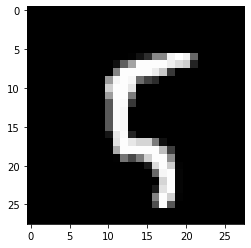

In [7]:
plt.imshow(X_train[100],cmap='gray')
plt.show()

In [8]:
y_train[100]

5

If we are using Tensorflow, the format should be (batch, height, width, channels). If we are using Theano, the format should be (batch, channels, height, width).

In [9]:
## reshapeing our data into format of(s,h,w,c)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#feature scaling
X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /=255
X_test /=255

we need to one-hot encode the labels i.e. Y_train and Y_test. 


Y_train[0] = [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] since the label representated by it is 5.

In [10]:
## convert our data into one hot encoding form
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
y_train[:3]  #

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## build the model

In [12]:
model = Sequential()  #create an object for this seq. 

model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))  # first conv. layer
#no_filter,filter_size,a_f,input_shape

model.add(MaxPooling2D(2,2))   #max pooling layer

model.add(Convolution2D(64,3,3,activation='relu'))   #second conv. layer

model.add(MaxPooling2D(2,2))    #max pooling layer

model.add(Dropout(0.25))     # dropout layer


model.add(Flatten())      

model.add(Dense(1000,activation='relu'))   #first hidden layer

model.add(Dropout(0.5))   ## dropout layer

model.add(Dense(10,activation='softmax'))  #output layer

/home/vinit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vinit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [74]:
32*3*3+32

320

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

### Now we need to compile the model.

In [14]:
from keras.optimizers import Adam

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])

when using the categorical_crossentropy loss, our targets should be in categorical format (e.g. if we have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample).

**If there were 2 classes, we would have used binary_crossentropy.**

The optimizer is responsible for updating the weights of the neurons via backpropagation.

To reduce over-fitting, we use another technique known as Data Augmentation. Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize well and not remember specific data

In [ ]:
## data Aug.
##we generate random images with some manipulations

In [16]:
train_gen = ImageDataGenerator(shear_range=.2,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator() #validation data

In [17]:
train_generator = train_gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

Here we are using batch of 64, so the model will take 64 images at a time and train on them.

In [ ]:
# 50 or 60

In [18]:
model.fit_generator(train_generator,steps_per_epoch=60000/64,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=10000/64)


Epoch 1/15
710/937 [=====================>........] - ETA: 14s - loss: 0.9976 - accuracy: 0.6582

KeyboardInterrupt: 

In [ ]:
#train_gen1=ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                              height_shift_range=0.08, zoom_range=0.08,horizontal_flip=True)

#test_gen1 = ImageDataGenerator()

In [ ]:
#train_generator1 = train_gen1.flow(X_train, y_train, batch_size=64)
#test_generator1 = test_gen1.flow(X_test, y_test, batch_size=64)

In [ ]:
#model.fit_generator(train_generator1,steps_per_epoch=60000/64,epochs=10,validation_data=test_generator1,validation_steps=10000/64)

In [ ]:
# serialize weights to HDF5

In [ ]:
#model.save_weights()

In [ ]:
model.save('mnist_cnn.h5')  

In [19]:
from keras.models import load_model

In [20]:
loaded_model = load_model('mnist_model.h5')
#loaded_model = load_model('mnist_cnn.h5')

In [ ]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

In [ ]:
score = loaded_model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

In [61]:
import cv2    #  
import matplotlib.pyplot as plt

img = cv2.imread('2test.png')   #read the image ,0-gray scale

In [62]:
img.shape  # will be array

(204, 163, 3)

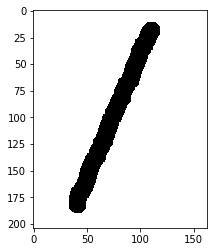

In [63]:
plt.imshow(img,cmap='gray')
#plt.axis('off')

In [64]:
img = np.invert(img)  #

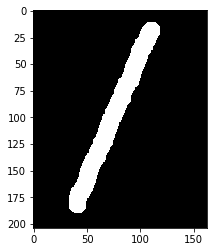

In [65]:
plt.imshow(img,cmap='gray')

In [66]:
img = cv2.resize(img, (28, 28))   #

In [67]:
img.shape

(28, 28, 3)

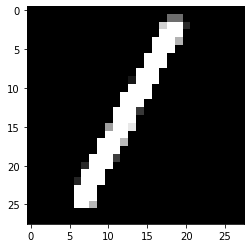

In [68]:
plt.imshow(img,cmap='gray')

In [ ]:
cv2.imwrite(img,'sample.png')  #write

In [69]:
type(img)

numpy.ndarray

In [70]:
img.max()

255

In [71]:
img = img/255

In [72]:
img = img.reshape(1,28,28,3)

In [ ]:
#model.predict_classes(img)

In [73]:
loaded_model.predict_classes(img)

array([1])

In [ ]:
## create some complex cnn model
## data augmentation:
## pretrained model (transfer learning)

##fashion mnist data(10,gray images)